## Clean Dataframes with E-Ladestation Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_els = pd.read_csv("../data/ladestationen_MUC_georg.csv")
df_els["aufstelldatum"] = pd.to_datetime(df_els["aufstelldatum"])
df_els.head(3)

,FID,anzahl_els,anzahl_lp_ac,anzahl_lp_alle,anzahl_lp_dc,anzahl_stpl,aufstelldatum,bemerkung,stadtbezirk,standort,haupttyp,haupttyp_bedeutung,shape
0,opendata_ruhver_els_point.1,1,2,2,0,2,2017-05-29,NaN,6,Urbanstr. 2,0,In Betrieb befindliche Ladesäulen,POINT (689684.126600797 5331783.312798096)
1,opendata_ruhver_els_point.2,1,2,2,0,2,2017-10-12,NaN,6,Urbanstr. 6,0,In Betrieb befindliche Ladesäulen,POINT (689751.0750007983 5331777.291698092)
2,opendata_ruhver_els_point.3,2,4,4,0,4,2017-09-14,NaN,18,Reginfriedstr. 2,0,In Betrieb befindliche Ladesäulen,POINT (691870.9652008448 5331775.829797959)


In [602]:
df_els_bezirk = df_els.groupby("stadtbezirk")["anzahl_stpl"].sum()
#.plot(kind="bar")

In [4]:
df_bna = pd.read_csv("../data/ladestationen_BNA_georg.csv")
df_bna["Standort"] = df_bna["Straße"] + " " + df_bna["Hausnummer"]
df_bna["Inbetriebnahmedatum"] = pd.to_datetime(df_bna["Inbetriebnahmedatum"])

C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\267833157.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_bna["Inbetriebnahmedatum"] = pd.to_datetime(df_bna["Inbetriebnahmedatum"])


In [6]:
df_bna_red = df_bna[["Inbetriebnahmedatum", "Standort", "Anzahl Ladepunkte", 
                     "Betreiber", "Postleitzahl", "Breitengrad", "Längengrad"]]

df_bna_red = df_bna_red.rename(columns={"Inbetriebnahmedatum":"Datum", "Anzahl Ladepunkte":"Ladepunkte"})

In [7]:
df_els_red = df_els[["aufstelldatum", "standort", "anzahl_stpl", "stadtbezirk", "shape"]]

df_els_red = df_els_red.rename(columns={"anzahl_stpl":"Ladepunkte", "aufstelldatum":"Datum", "stadtbezirk":"Bezirk",
                                       "standort":"Standort"})

In [8]:
df_bna_red.sort_values("Standort").head(5)

,Datum,Standort,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
406,2020-07-07,Adalbertstraße 82,3,Qwello GmbH,80799,"48,153788","11,573262"
1448,2019-05-09,Adam-Berg-Str. 24,2,SWM Versorgungs GmbH,81735,"48,11371","11,622677"
225,2019-10-16,Agnes-Bernauer-Pl. 8,2,SWM Versorgungs GmbH,80687,"48,140193","11,49647"
226,2019-10-16,Agnes-Bernauer-Pl. 8a,2,SWM Versorgungs GmbH,80687,"48,140208","11,49631"
1107,2018-04-12,Agnes-Pockels-Bogen 1,2,SWM Versorgungs GmbH,80992,"48,173258","11,532358"


In [9]:
df_els_red.sort_values("Standort").head(5)

,Datum,Standort,Ladepunkte,Bezirk,shape
105,2019-04-17,Adam-Berg-Str. 24,4,16,POINT (695197.4377009186 5332245.63149773)
138,2019-09-04,Agnes-Bernauer-Platz 8,4,25,POINT (685710.6557007167 5334898.457198311)
186,2018-04-05,Agnes-Pockels-Bogen 1,2,10,POINT (688265.6010007665 5338656.678198167)
133,2018-12-05,Aindorferstr. 135,4,25,POINT (685594.1170007145 5334010.582798319)
129,2018-12-05,Aindorferstr. 91a,4,25,POINT (686003.9546007224 5333899.750998299)


In [10]:
df_bna_red[df_bna_red["Betreiber"] == "SWM Versorgungs GmbH"]

,Datum,Standort,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
0,2020-01-31,Karl-Hromadnik-Str. 2,2,SWM Versorgungs GmbH,80241,"48,137018","11,456796"
1,2018-12-07,Peter-Kreuder-Str. 5,2,SWM Versorgungs GmbH,80245,"48,159746","11,445709"
2,2018-12-07,Peter-Kreuder-Str. 5a,2,SWM Versorgungs GmbH,80245,"48,159701","11,445643"
3,2018-12-11,Wiesentfelser Str. 16,2,SWM Versorgungs GmbH,80249,"48,147492","11,419531"
12,2017-12-19,Westenriederstr. 39,2,SWM Versorgungs GmbH,80331,"48,135012","11,579745"
...,...,...,...,...,...,...,...
1607,2017-08-07,Robert-Heger-Str. 22,2,SWM Versorgungs GmbH,81927,"48,158571","11,642595"
1608,2019-11-18,Meistersingerstr. 118,2,SWM Versorgungs GmbH,81927,"48,157852","11,637345"
1609,2020-01-13,Schnorr-von-Carolsfeld-Str. 17,2,SWM Versorgungs GmbH,81927,"48,15734","11,646599"
1612,2018-12-07,Marienburger Str. 1,2,SWM Versorgungs GmbH,81929,"48,119093","11,674363"


In [11]:
df_bna_red_ind = df_bna_red.set_index(df_bna_red["Datum"])

In [12]:
df_bna_LP_month = df_bna_red_ind.groupby([(df_bna_red_ind.Datum.index.year
                                          ), (df_bna_red_ind.Datum.index.month)])['Ladepunkte'].sum()

In [13]:
df_bna_LP_month

Datum  Datum
2015   7         4
       12        7
2016   5         2
       9         2
       11        3
                ..
2023   7         9
       9        13
       11       23
       12       20
2024   1         5
Name: Ladepunkte, Length: 79, dtype: int64

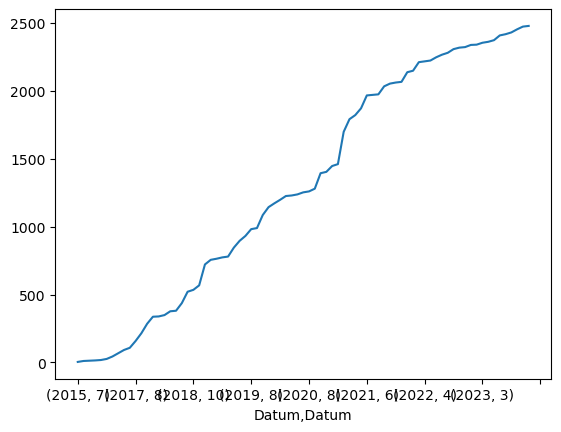

In [14]:
df_bna_LP_month.cumsum().plot()
plt.show()

In [15]:
df_bna_red.head()

,Datum,Standort,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
0,2020-01-31,Karl-Hromadnik-Str. 2,2,SWM Versorgungs GmbH,80241,"48,137018","11,456796"
1,2018-12-07,Peter-Kreuder-Str. 5,2,SWM Versorgungs GmbH,80245,"48,159746","11,445709"
2,2018-12-07,Peter-Kreuder-Str. 5a,2,SWM Versorgungs GmbH,80245,"48,159701","11,445643"
3,2018-12-11,Wiesentfelser Str. 16,2,SWM Versorgungs GmbH,80249,"48,147492","11,419531"
4,2022-01-13,Sparkassen Str. 2-4,1,Stadtsparkasse München AdöR,80331,"48,1368071","11,5778407"


In [16]:
df_BNA_dat = df_bna_red.groupby("Datum")["Ladepunkte"].sum().reset_index()
df_BNA_dat

,Datum,Ladepunkte
0,2015-07-01,4
1,2015-12-04,7
2,2016-05-31,2
3,2016-09-14,2
4,2016-11-30,3
...,...,...
268,2023-12-22,2
269,2023-12-23,4
270,2023-12-29,2
271,2024-01-01,3


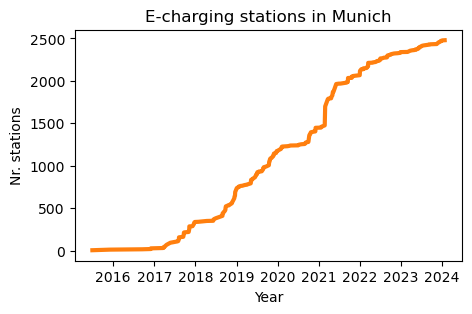

In [567]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(df_BNA_dat["Datum"], df_BNA_dat["Ladepunkte"].cumsum(), linewidth=3, color="C1")
ax.set_title("E-charging stations in Munich")
ax.set_ylabel("Nr. stations")
ax.set_xlabel("Year")
#plt.grid()
plt.savefig('E-charg_MUC.png', bbox_inches='tight')
plt.show()

In [18]:
df_els_date = df_els_red.set_index(df_els_red["Datum"])
df_els_LP_month = df_els_date.groupby([(df_els_date.Datum.index.year
                                          ), (df_els_date.Datum.index.month)])['Ladepunkte'].sum()

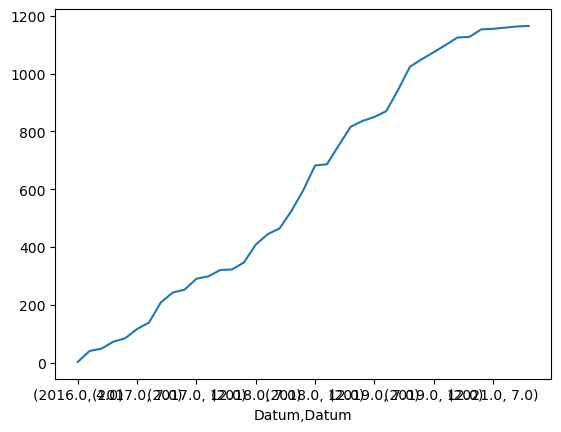

In [19]:
df_els_LP_month.cumsum().plot()
plt.show()

In [30]:
df_bez = pd.read_csv("../data/MUC_Bezirke_Einwohner_georg.csv")

In [31]:
df_bez.head()

,Bezirk,Bezirksname,Fläche,Einwohner,Dichte
0,1,Altstadt-Lehel,3.15,20.860,6.631
1,2,Ludwigsvorstadt-Isarvorstadt,4.40,49.876,11.331
2,3,Maxvorstadt,4.30,51.945,12.085
3,4,Schwabing-West,4.36,68.254,15.643
4,5,Au-Haidhausen,4.22,63.583,15.067
5,6,Sendling,3.94,40.790,10.356
6,7,Sendling-Westpark,7.81,62.065,7.942
7,8,Schwanthalerhöhe,2.07,28.732,13.878
8,9,Neuhausen-Nymphenburg,12.91,100.396,7.774
9,10,Moosach,11.09,55.851,5.034


In [29]:
df_els_red_bez = df_els_red.groupby("Bezirk")["Ladepunkte"].sum().reset_index()

,Bezirk,Ladepunkte
0,1,62
1,2,52
2,3,65
3,4,70
4,5,56
5,6,32
6,7,38
7,8,24
8,9,114
9,10,28


In [47]:
df_els_merge = pd.merge(df_els_red_bez,df_bez, how="outer")
df_els_merge["Punkte_tsd_Einw"] = df_els_merge["Ladepunkte"] / df_els_merge["Einwohner"]
df_els_merge["Punkte_Fläche"] = df_els_merge["Ladepunkte"] / df_els_merge["Fläche"]
df_els_merge["Punkte_Dichte"] = df_els_merge["Ladepunkte"] / df_els_merge["Dichte"]
df_els_merge.sort_values("Punkte_Fläche", ascending=False)

,Bezirk,Ladepunkte,Bezirksname,Fläche,Einwohner,Dichte,Punkte_tsd_Einw,Punkte_Fläche,Punkte_Dichte
0,1,62,Altstadt-Lehel,3.15,20.860,6.631,2.972196,19.682540,9.350023
3,4,70,Schwabing-West,4.36,68.254,15.643,1.025581,16.055046,4.474845
2,3,65,Maxvorstadt,4.30,51.945,12.085,1.251324,15.116279,5.378568
4,5,56,Au-Haidhausen,4.22,63.583,15.067,0.880739,13.270142,3.716732
1,2,52,Ludwigsvorstadt-Isarvorstadt,4.40,49.876,11.331,1.042586,11.818182,4.589180
7,8,24,Schwanthalerhöhe,2.07,28.732,13.878,0.835306,11.594203,1.729356
24,25,54,Laim,5.29,56.716,10.729,0.952112,10.207940,5.033088
8,9,114,Neuhausen-Nymphenburg,12.91,100.396,7.774,1.135503,8.830364,14.664266
5,6,32,Sendling,3.94,40.790,10.356,0.784506,8.121827,3.089996
17,18,48,Untergiesing-Harlaching,8.06,53.909,6.691,0.890389,5.955335,7.173816


In [77]:
df_els_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bezirk           25 non-null     int64  
 1   Ladepunkte       25 non-null     int64  
 2   Bezirksname      25 non-null     object 
 3   Fläche           25 non-null     float64
 4   Einwohner        25 non-null     float64
 5   Dichte           25 non-null     float64
 6   Punkte_tsd_Einw  25 non-null     float64
 7   Punkte_Fläche    25 non-null     float64
 8   Punkte_Dichte    25 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.9+ KB


C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\516581471.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt. tight_layout()


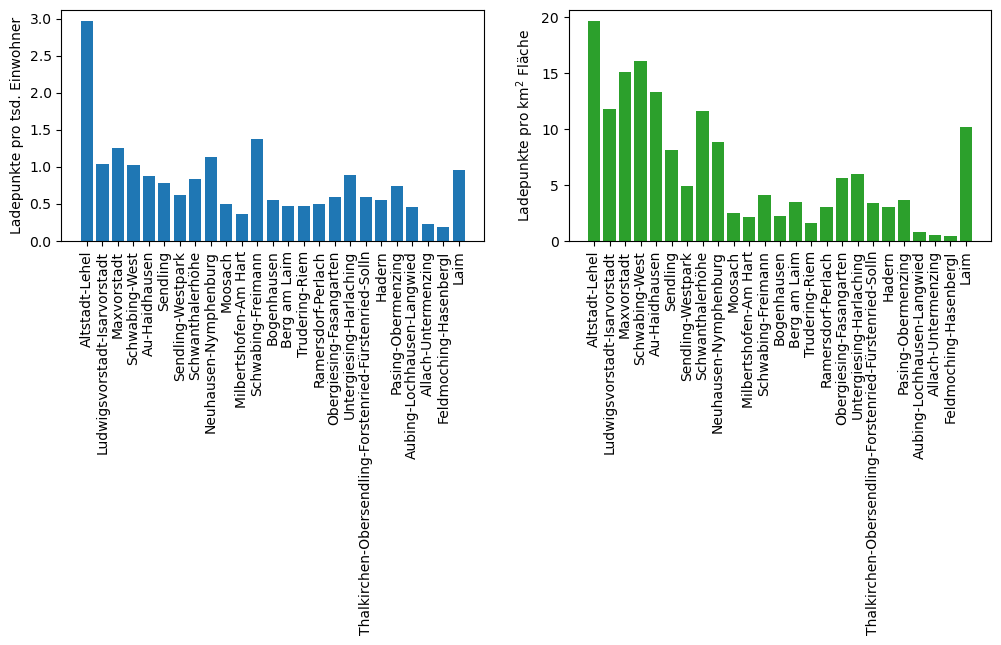

In [65]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].bar(df_els_merge["Bezirksname"], df_els_merge["Punkte_tsd_Einw"])
ax[1].bar(df_els_merge["Bezirksname"], df_els_merge["Punkte_Fläche"], color="C2")
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel("Ladepunkte pro tsd. Einwohner")
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel("Ladepunkte pro km$^2$ Fläche")
plt. tight_layout()
plt.show()

## BNA Daten mit Bezirk

In [252]:
df_BNA_bez = pd.read_csv("../data/Ladesaeulenregister_mit_Bezirk.csv")
df_BNA_bez["Inbetriebnahmedatum"] = pd.to_datetime(df_BNA_bez["Inbetriebnahmedatum"])
df_BNA_bez.head()

C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\3659230739.py:2: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Betreiber,Straße,Hausnummer,Adresszusatz,Postleitzahl,Ort,Bundesland,Kreis/kreisfreie Stadt,Breitengrad,Längengrad,...,Steckertypen2,P2 [kW],Public Key2,Steckertypen3,P3 [kW],Public Key3,Steckertypen4,P4 [kW],Public Key4,Stadtbezirk
0,SWM Versorgungs GmbH,Karl-Hromadnik-Str.,2,NaN,80241,München,Bayern,Kreisfreie Stadt München,48.137.018,11.456.796,...,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
1,SWM Versorgungs GmbH,Peter-Kreuder-Str.,5,NaN,80245,München,Bayern,Kreisfreie Stadt München,48.159.746,11.445.709,...,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
2,SWM Versorgungs GmbH,Peter-Kreuder-Str.,5a,NaN,80245,München,Bayern,Kreisfreie Stadt München,48.159.701,11.445.643,...,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,SWM Versorgungs GmbH,Wiesentfelser Str.,16,NaN,80249,München,Bayern,Kreisfreie Stadt München,48.147.492,11.419.531,...,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
4,Stadtsparkasse München AdöR,Sparkassen Str.,2-4,NaN,80331,München,Bayern,Kreisfreie Stadt München,481.368.071,115.778.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,Stadtsparkasse München AdöR,Sparkassen Str.,2-4,NaN,80331,München,Bayern,Kreisfreie Stadt München,481.368.071,115.778.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,Stadtsparkasse München AdöR,Sparkassen Str.,2-4,NaN,80331,München,Bayern,Kreisfreie Stadt München,481.368.071,115.778.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,Stadtsparkasse München AdöR,Sparkassen Str.,2-4,NaN,80331,München,Bayern,Kreisfreie Stadt München,481.368.071,115.778.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,Stadtsparkasse München AdöR,Sparkassen Str.,2-4,NaN,80331,München,Bayern,Kreisfreie Stadt München,481.368.071,115.778.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,Stadtsparkasse München AdöR,Sparkassen Str.,2-4,NaN,80331,München,Bayern,Kreisfreie Stadt München,481.368.071,115.778.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [254]:
#df_BNA_bez = df_BNA_bez.drop_duplicates()

In [255]:
#subset=['Betreiber', 'Straße', 'Hausnummer', 'Inbetriebnahmedatum', 'Nennleistung Ladeeinrichtung [kW]', 'Breitengrad', 'Längengrad']

In [257]:
df_BNA_bez_drop.shape

(1470, 27)

In [258]:
df_test_for_dupl = df_BNA_bez[df_BNA_bez["Straße"] == "Knorrstraße"][["Betreiber", "Straße", "Hausnummer", "Anzahl Ladepunkte", "Adresszusatz", "Inbetriebnahmedatum",
                                                       "Breitengrad", "Längengrad", "Nennleistung Ladeeinrichtung [kW]"]].head(30)
df_test_for_dupl.head()

,Betreiber,Straße,Hausnummer,Anzahl Ladepunkte,Adresszusatz,Inbetriebnahmedatum,Breitengrad,Längengrad,Nennleistung Ladeeinrichtung [kW]
546,E.ON Drive GmbH,Knorrstraße,147,1,NaN,2020-07-15,48.193.168,11.571.086,"3,7"
547,E.ON Drive GmbH,Knorrstraße,147,1,NaN,2020-07-15,48.193.197,11.571.057,"3,7"
548,E.ON Drive GmbH,Knorrstraße,147,1,NaN,2020-08-28,48.193.175,11.571.079,"3,7"
549,E.ON Drive GmbH,Knorrstraße,147,1,NaN,2020-10-08,48.177.824,11.571.124,"3,7"
550,E.ON Drive GmbH,Knorrstraße,147,1,NaN,2020-10-08,48.193.102,11.571.147,"3,7"


In [267]:
df_BNA_bez_red = df_BNA_bez[["Inbetriebnahmedatum", "Stadtbezirk", "Anzahl Ladepunkte", 
                     "Betreiber", "Postleitzahl", "Breitengrad", "Längengrad"]]

df_BNA_bez_red = df_BNA_bez_red.rename(columns={"Inbetriebnahmedatum":"Datum", "Anzahl Ladepunkte":"Ladepunkte", "Stadtbezirk":"Bezirk"})

In [268]:
df_BNA_bez_red.dropna(subset=["Bezirk"], inplace=True)

In [269]:
df_BNA_bez_red["Bezirk"] = df_BNA_bez_red["Bezirk"].astype(int)

In [272]:
df_BNA_bez_red.head()

,Datum,Bezirk,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
0,2020-01-31,21,2,SWM Versorgungs GmbH,80241,48.137.018,11.456.796
1,2018-12-07,21,2,SWM Versorgungs GmbH,80245,48.159.746,11.445.709
2,2018-12-07,21,2,SWM Versorgungs GmbH,80245,48.159.701,11.445.643
3,2018-12-11,22,2,SWM Versorgungs GmbH,80249,48.147.492,11.419.531
4,2022-01-13,1,1,Stadtsparkasse München AdöR,80331,481.368.071,115.778.407


In [270]:
df_BNA_bez_red_sum = df_BNA_bez_red.groupby("Bezirk")["Ladepunkte"].sum().reset_index()

In [271]:
df_veh_bez = pd.read_csv("../data/vehicle_population_munich_2023.csv")

In [266]:
df_BNA_merge = pd.merge(df_BNA_bez_red_sum, df_bez, how="outer")
df_BNA_merge["PKW"] = df_veh_bez["Personenkraftwagen"]
df_BNA_merge["Punkte_tsd_Einw"] = df_BNA_merge["Ladepunkte"] / df_BNA_merge["Einwohner"]
df_BNA_merge["Punkte_Fläche"] = df_BNA_merge["Ladepunkte"] / df_BNA_merge["Fläche"]
df_BNA_merge["Punkte_Dichte"] = df_BNA_merge["Ladepunkte"] / df_BNA_merge["Dichte"]
df_BNA_merge["Punkte_tsd_PKW"] = (df_BNA_merge["Ladepunkte"] / df_BNA_merge["PKW"])*1000
df_BNA_merge.head()

,Bezirk,Ladepunkte,Bezirksname,Fläche,Einwohner,Dichte,PKW,Punkte_tsd_Einw,Punkte_Fläche,Punkte_Dichte,Punkte_tsd_PKW
0,1,75,Altstadt-Lehel,3.15,20.860,6.631,68311,3.595398,23.809524,11.310511,1.097920
1,2,62,Ludwigsvorstadt-Isarvorstadt,4.40,49.876,11.331,16861,1.243083,14.090909,5.471715,3.677125
2,3,85,Maxvorstadt,4.30,51.945,12.085,25488,1.636346,19.767442,7.033513,3.334903
3,4,66,Schwabing-West,4.36,68.254,15.643,22743,0.966976,15.137615,4.219140,2.901992
4,5,68,Au-Haidhausen,4.22,63.583,15.067,19839,1.069468,16.113744,4.513174,3.427592
5,6,38,Sendling,3.94,40.790,10.356,29444,0.931601,9.644670,3.669370,1.290586
6,7,62,Sendling-Westpark,7.81,62.065,7.942,26358,0.998953,7.938540,7.806598,2.352227
7,8,26,Schwanthalerhöhe,2.07,28.732,13.878,11722,0.904914,12.560386,1.873469,2.218052
8,9,142,Neuhausen-Nymphenburg,12.91,100.396,7.774,36650,1.414399,10.999225,18.266015,3.874488
9,10,70,Moosach,11.09,55.851,5.034,26093,1.253335,6.311993,13.905443,2.682712


C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\516581471.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



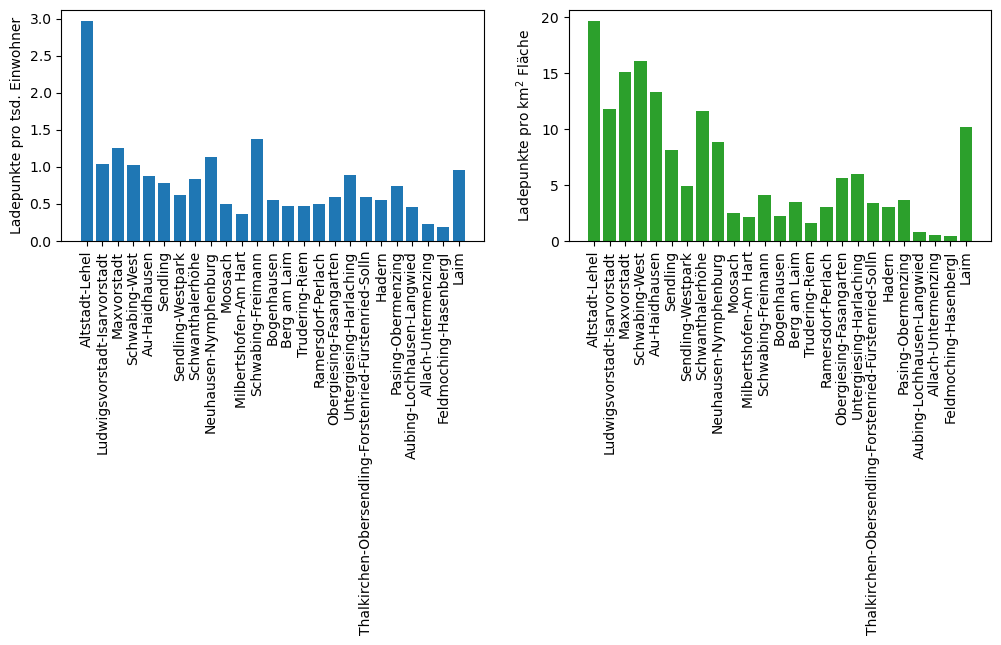

In [222]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].bar(df_els_merge["Bezirksname"], df_els_merge["Punkte_tsd_Einw"])
ax[1].bar(df_els_merge["Bezirksname"], df_els_merge["Punkte_Fläche"], color="C2")
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel("Ladepunkte pro tsd. Einwohner")
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel("Ladepunkte pro km$^2$ Fläche")
plt. tight_layout()
plt.show()

In [612]:
df_BNA_merge_sort = df_BNA_merge.sort_values("Punkte_tsd_PKW", ascending=False)

C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\1362975941.py:11: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



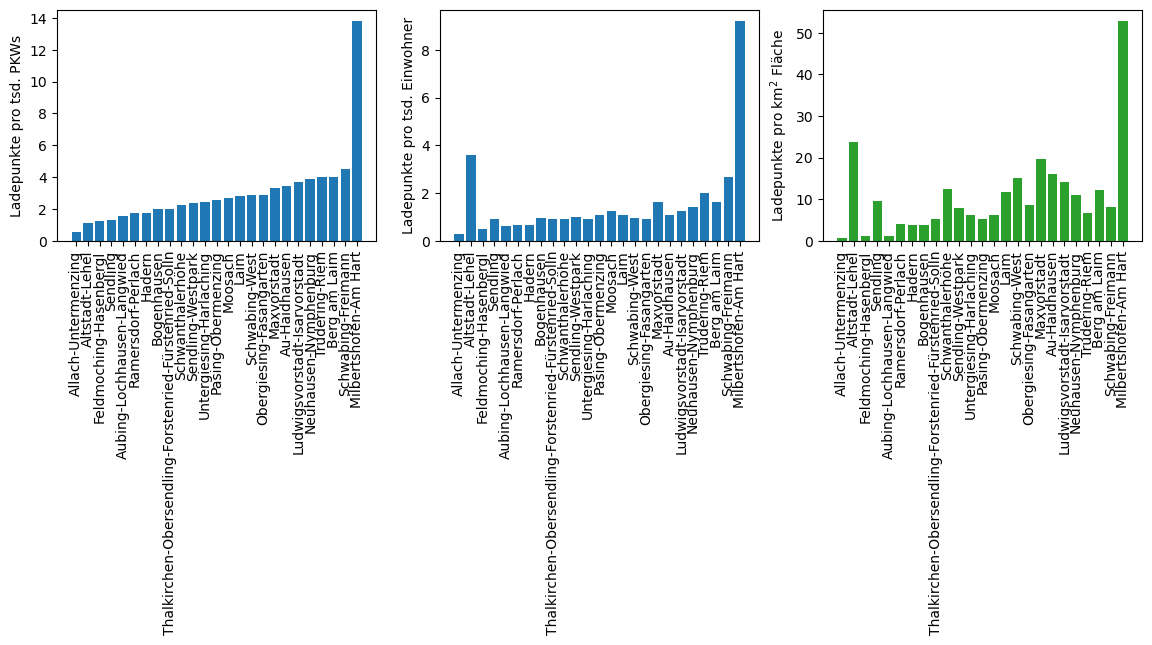

In [586]:
fig, ax = plt.subplots(1,3,figsize=(14,3))
ax[0].bar(df_BNA_merge_sort["Bezirksname"], df_BNA_merge_sort["Punkte_tsd_PKW"])
ax[1].bar(df_BNA_merge_sort["Bezirksname"], df_BNA_merge_sort["Punkte_tsd_Einw"])
ax[2].bar(df_BNA_merge_sort["Bezirksname"], df_BNA_merge_sort["Punkte_Fläche"], color="C2")
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel("Ladepunkte pro tsd. PKWs")
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel("Ladepunkte pro tsd. Einwohner")
ax[2].tick_params(axis='x', labelrotation=90)
ax[2].set_ylabel("Ladepunkte pro km$^2$ Fläche")
plt. tight_layout()
plt.show()

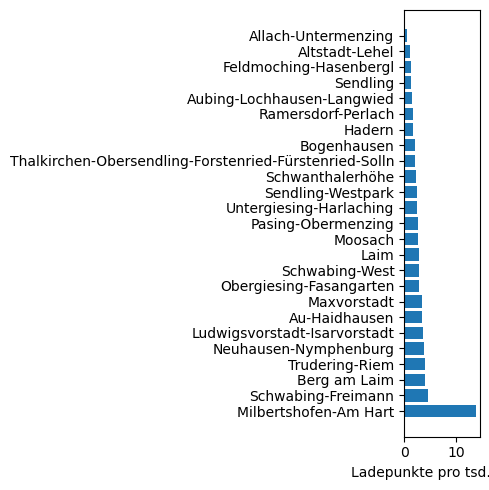

In [613]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.barh(df_BNA_merge_sort["Bezirksname"], df_BNA_merge_sort["Punkte_tsd_PKW"])
ax.set_xlabel("Ladepunkte pro tsd. PKWs")
ax.tick_params(axis='x', labelrotation=0)
plt.tight_layout()
plt.show()

In [624]:
cols = ['C1' if (x < 1.25) else 'C0' for x in df_BNA_merge_sort.Punkte_tsd_PKW]

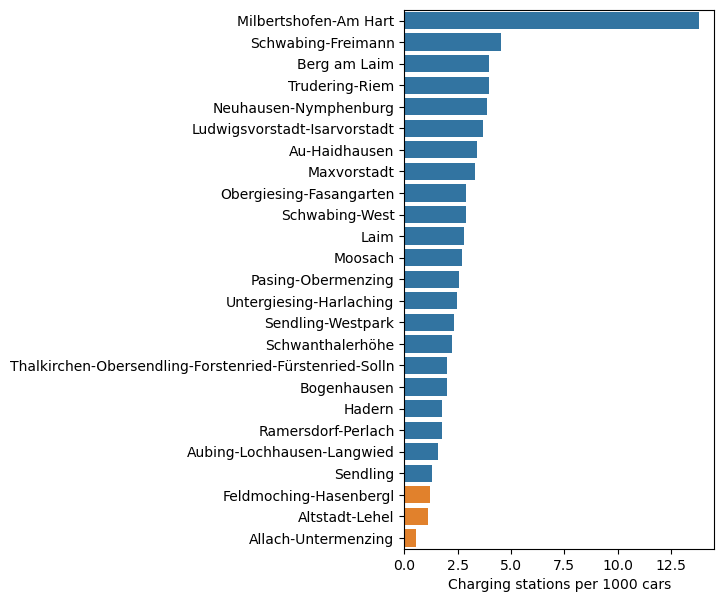

In [629]:
fig, ax = plt.subplots(figsize=(4,7))

sns.barplot(x="Punkte_tsd_PKW", y="Bezirksname", data=df_BNA_merge_sort, hue=cols)
ax.set_xlabel("Charging stations per 1000 cars")
ax.set_ylabel("")
plt.legend([],[], frameon=False)
plt.show()

In [412]:
df_BNA_merge.head()

,Bezirk,Ladepunkte,Bezirksname,Fläche,Einwohner,Dichte,PKW,Punkte_tsd_Einw,Punkte_Fläche,Punkte_Dichte,Punkte_tsd_PKW
0,1,75,Altstadt-Lehel,3.15,20.860,6.631,68311,3.595398,23.809524,11.310511,1.097920
1,2,62,Ludwigsvorstadt-Isarvorstadt,4.40,49.876,11.331,16861,1.243083,14.090909,5.471715,3.677125
2,3,85,Maxvorstadt,4.30,51.945,12.085,25488,1.636346,19.767442,7.033513,3.334903
3,4,66,Schwabing-West,4.36,68.254,15.643,22743,0.966976,15.137615,4.219140,2.901992
4,5,68,Au-Haidhausen,4.22,63.583,15.067,19839,1.069468,16.113744,4.513174,3.427592


In [413]:
df_BNA_merge.to_csv("../data/df_BNA_merge.csv")

In [390]:
df_BNA_bez_red_sort = df_BNA_bez_red.sort_values("Datum")

In [285]:
bezirke = list(range(1,26))

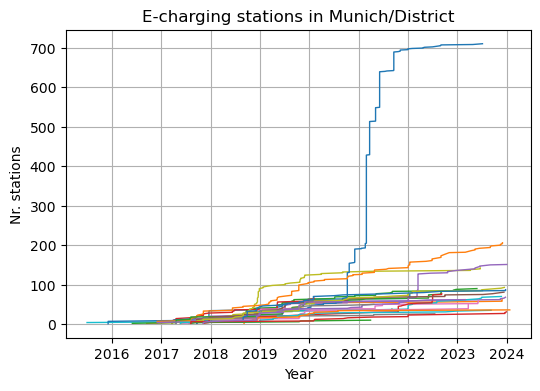

In [636]:
fig, ax = plt.subplots(figsize=(6,4))
for i in bezirke:
    ax.plot(df_BNA_bez_red_sort["Datum"][df_BNA_bez_red_sort["Bezirk"]==i], df_BNA_bez_red_sort["Ladepunkte"][df_BNA_bez_red_sort["Bezirk"]==i].cumsum(), linewidth=1)
    
#ax.plot(df_BNA_bez_red_sort["Datum"], df_BNA_bez_red_sort["Ladepunkte"].cumsum(), linewidth=3, color="darkred")

#ax.set_ylim(0,210)
ax.set_title("E-charging stations in Munich/District")
ax.set_ylabel("Nr. stations")
ax.set_xlabel("Year")
plt.grid()
#plt.savefig('E-charg_MUC.png', bbox_inches='tight')
plt.show()

In [313]:
df_ekfz = pd.read_csv("../data/df_ekfz.csv")

In [314]:
df_ekfz["date"] = pd.to_datetime(df_ekfz["date"])

In [315]:
df_ekfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  96 non-null     int64         
 1   Unnamed: 0    96 non-null     int64         
 2   MONAT         96 non-null     int64         
 3   Elektro       96 non-null     float64       
 4   Hybrid        96 non-null     float64       
 5   komb          96 non-null     float64       
 6   date          96 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 5.4 KB


In [316]:
df_ekfz.head()

,Unnamed: 0.1,Unnamed: 0,MONAT,Elektro,Hybrid,komb,date
0,0,0,201601,1224.0,4523.0,5747.0,2016-01-01
1,1,1,201602,1258.0,4576.0,5834.0,2016-02-01
2,2,2,201603,1279.0,4670.0,5949.0,2016-03-01
3,3,3,201604,1303.0,4814.0,6117.0,2016-04-01
4,4,4,201605,1323.0,4824.0,6147.0,2016-05-01


In [391]:
df_BNA_bez_red_sort.head()

,Datum,Bezirk,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
1098,2015-07-01,10,4,Park One GmbH,80992,481.823.931,115.308.946
503,2015-12-04,11,1,TotalEnergies,80807,4.818.836,1.157.445
528,2015-12-04,11,2,TotalEnergies,80809,48.177.711,11.556.978
529,2015-12-04,11,2,TotalEnergies,80809,48.177.711,11.556.978
530,2015-12-04,11,2,TotalEnergies,80809,48.177.711,11.556.978


In [414]:
#df_BNA_bez_red_sort = df_BNA_bez_red_sort.set_index(df_BNA_bez_red_sort["Datum"])

In [415]:
#df_BNA_bez_group = pd.DataFrame(df_BNA_bez_red_sort.groupby([(df_BNA_bez_red_sort.Datum.index.year
#                                          ), (df_BNA_bez_red_sort.Datum.index.month)])['Ladepunkte'].sum())

In [416]:
#df_BNA_bez_group.reset_index()

In [392]:
df_BNA_kfz_merge = pd.merge(df_ekfz, df_BNA_bez_red_sort, left_on="date", right_on="Datum", how="outer").sort_values("Datum")

In [393]:
df_BNA_kfz_merge.loc[df_BNA_kfz_merge['date'].isnull() == True, 'date'] = df_BNA_kfz_merge['Datum']
df_BNA_kfz_merge.loc[df_BNA_kfz_merge['Datum'].isnull() == True, 'Datum'] = df_BNA_kfz_merge['date']

In [397]:
df_BNA_kfz_merge = df_BNA_kfz_merge[["Datum", "Ladepunkte", "Elektro", "Hybrid", "komb"]].sort_values("Datum")
df_BNA_kfz_merge = df_BNA_kfz_merge.iloc[5:1673,:]
df_BNA_kfz_merge["Ladepunkte"] = df_BNA_kfz_merge["Ladepunkte"].cumsum()

In [401]:
df_BNA_kfz_merge['Ladepunkte'].fillna(method='ffill', inplace=True)
df_BNA_kfz_merge = df_BNA_kfz_merge.iloc[5:,:]

C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\977826668.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [405]:
df_BNA_kfz_merge['Elektro'].fillna(method='ffill', inplace=True)
df_BNA_kfz_merge['Hybrid'].fillna(method='ffill', inplace=True)
df_BNA_kfz_merge['komb'].fillna(method='ffill', inplace=True)

C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\107723996.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\107723996.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\107723996.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [406]:
df_BNA_kfz_merge.head(20)

,Datum,Ladepunkte,Elektro,Hybrid,komb
0,2016-01-01,11.0,1224.0,4523.0,5747.0
1,2016-02-01,11.0,1258.0,4576.0,5834.0
2,2016-03-01,11.0,1279.0,4670.0,5949.0
3,2016-04-01,11.0,1303.0,4814.0,6117.0
4,2016-05-01,11.0,1323.0,4824.0,6147.0
165,2016-05-31,13.0,1323.0,4824.0,6147.0
5,2016-06-01,13.0,1358.0,4872.0,6230.0
6,2016-07-01,13.0,1431.0,4989.0,6420.0
7,2016-08-01,13.0,1470.0,5045.0,6515.0
8,2016-09-01,13.0,1549.0,5119.0,6668.0


In [494]:
from datetime import datetime

In [418]:
import statsmodels.api as sm

In [531]:
df_BNA_regress = df_BNA_kfz_merge.copy()

In [532]:
df_BNA_kfz_merge.index[df_BNA_kfz_merge["Datum"]== "2019-01-01"]

Index([38], dtype='int64')

In [533]:
df_BNA_regress = df_BNA_regress.loc[38:,:]

In [534]:
df_BNA_regress['Datum'] = (df_BNA_regress['Datum'] - pd.Timestamp("2019-01-01")) // pd.Timedelta('1d')

In [535]:
df_BNA_regress.head()

,Datum,Ladepunkte,Elektro,Hybrid,komb
38,0,722.0,3249.0,11177.0,14426.0
510,2,724.0,3249.0,11177.0,14426.0
513,2,726.0,3249.0,11177.0,14426.0
509,2,728.0,3249.0,11177.0,14426.0
511,2,730.0,3249.0,11177.0,14426.0


In [536]:
# Define the dependent and independent variables
X = df_BNA_regress[['Datum']]
y = df_BNA_regress['Ladepunkte']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Ladepunkte   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 1.714e+04
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:57:48   Log-Likelihood:                -8047.6
No. Observations:                1297   AIC:                         1.610e+04
Df Residuals:                    1295   BIC:                         1.611e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        721.7634      7.700     93.734      0.0

In [538]:
fitted_values = model.fittedvalues

In [539]:
model.predict([20,1])

array([14436.41685861])

In [546]:
pred = 721.7634 + 1.1485 * (1826 + 2*365)
pred

3657.3294000000005

In [552]:
pred_ratio = pred/195105

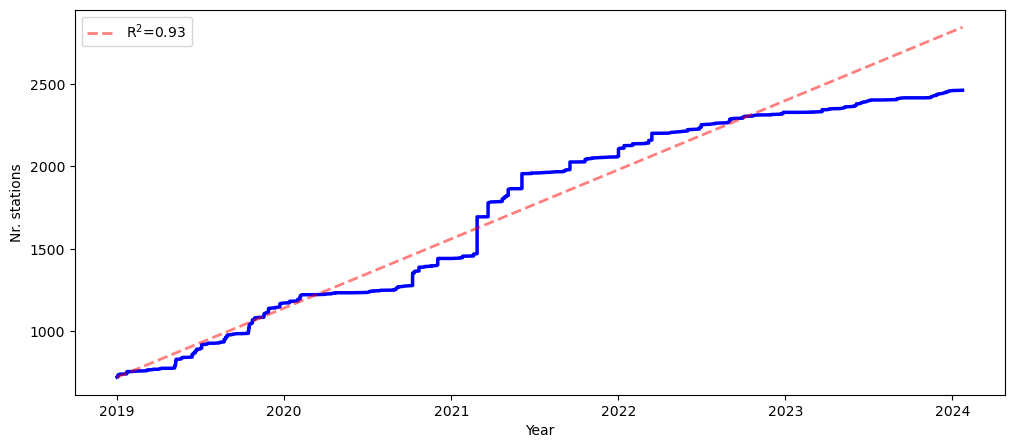

In [631]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(df_BNA_kfz_merge.loc[38:,:]["Datum"], df_BNA_kfz_merge.loc[38:,:]["Ladepunkte"], linewidth=2.5, color="b")
ax.plot(df_BNA_kfz_merge.loc[38:,:]["Datum"], fitted_values, linewidth=2, color="red", alpha=0.5, linestyle="--", label="R$^2$=0.93")
#ax.set_title("E-charging stations in Munich")
ax.set_ylabel("Nr. stations")
ax.set_xlabel("Year")
#ax.tick_params(axis='x', labelrotation=90)
#plt.grid()
#plt.savefig('E-charg_MUC.png', bbox_inches='tight')
ax.legend()
plt.show()

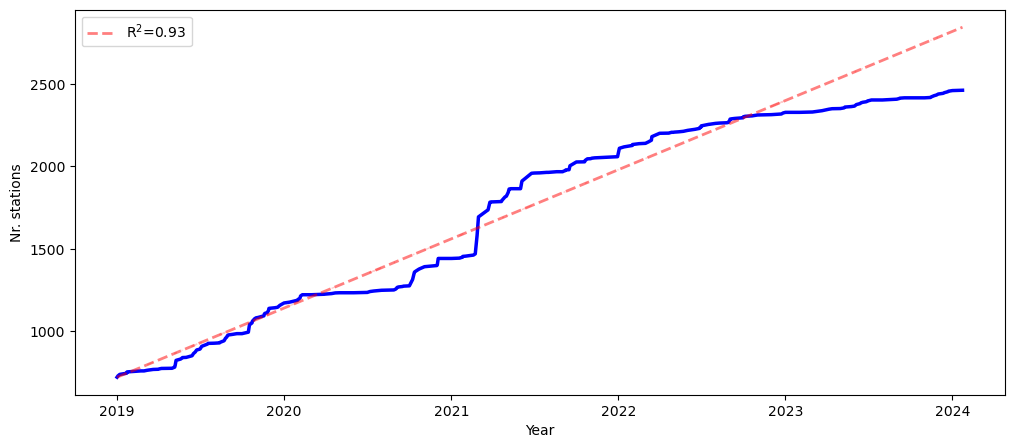

In [635]:
fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(x=df_BNA_kfz_merge.loc[38:,:]["Datum"], y=df_BNA_kfz_merge.loc[38:,:]["Ladepunkte"], linewidth=2.5, color="b")
sns.lineplot(x=df_BNA_kfz_merge.loc[38:,:]["Datum"], y=fitted_values, linewidth=2, color="red", alpha=0.5, linestyle="--", label="R$^2$=0.93")
#ax.set_title("E-charging stations in Munich")
ax.set_ylabel("Nr. stations")
ax.set_xlabel("Year")
#ax.tick_params(axis='x', labelrotation=90)
#plt.grid()
#plt.savefig('E-charg_MUC.png', bbox_inches='tight')
ax.legend()
plt.show()

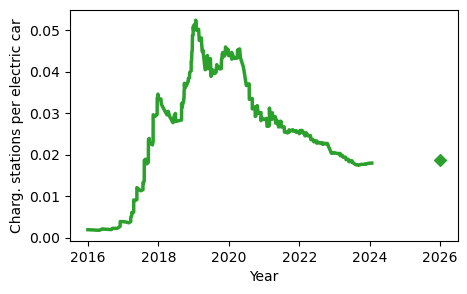

In [597]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(df_BNA_kfz_merge["Datum"], df_BNA_kfz_merge["Ladepunkte"]/df_BNA_kfz_merge["komb"], linewidth=2.5, color="C2")
ax.scatter(datetime.strptime("2026-01-01", '%Y-%m-%d').date(), pred_ratio, color="C2", marker ="D")
#ax.set_title("E-charging stations in Munich")
ax.set_ylabel("Charg. stations per electric car")
ax.set_xlabel("Year")
#plt.grid()
#plt.savefig('E-charg_MUC.png', bbox_inches='tight')
plt.show()

In [542]:
date2019 = (df_BNA_kfz_merge["Datum"][df_BNA_kfz_merge["Datum"]== "2024-01-01"] - pd.Timestamp("2024-01-01")) // pd.Timedelta('1d')
date2019

1682    0
Name: Datum, dtype: int64

In [543]:
fitted_values

38       721.763419
510      724.060392
513      724.060392
509      724.060392
511      724.060392
           ...     
1680    2808.564063
1679    2808.564063
1681    2815.454984
1682    2818.900445
1683    2844.167156
Length: 1297, dtype: float64

In [544]:
df_BNA_kfz_merge["Datum"]

0      2016-01-01
1      2016-02-01
2      2016-03-01
3      2016-04-01
4      2016-05-01
          ...    
1680   2023-12-23
1679   2023-12-23
1681   2023-12-29
1682   2024-01-01
1683   2024-01-23
Name: Datum, Length: 1679, dtype: datetime64[ns]

In [545]:
df_BNA_regress[['Datum']]

,Datum
38,0
510,2
513,2
509,2
511,2
...,...
1680,1817
1679,1817
1681,1823
1682,1826
